In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
from collections import Counter
from string import punctuation
from matplotlib import rcParams
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
messages = pd.read_json('accenture.json')
messages

,Title,Date,Link
0,"[World Economic Forum, Accenture and EPRI Laun...","November 03, 2021",https://newsroom.accenture.com/news/world-econ...
1,[Accenture Acquires BCS Consulting to Strength...,"October 28, 2021",https://newsroom.accenture.com/news/accenture-...
2,[CEOs Unequivocally Call for Bold Government A...,"October 31, 2021",https://newsroom.accenture.com/news/ceos-unequ...
3,[Accenture Positioned as a Leader in IDC Marke...,"November 01, 2021",https://newsroom.accenture.com/news/accenture-...
4,[More than Half of Organizations Not Effective...,"November 03, 2021",https://newsroom.accenture.com/news/more-than-...
...,...,...,...
4865,[Accenture Collaborates with Chubu Electric Po...,"August 09, 2021",https://newsroom.accenture.com/news/accenture-...
4866,[National Wildlife Federation Expands Its “Gar...,"August 03, 2021",https://newsroom.accenture.com/news/national-w...
4867,[Accenture Named a Leader in ‘Salesforce Consu...,"August 03, 2021",https://newsroom.accenture.com/news/accenture-...
4868,[Global Cyber Intrusion Activity More than Dou...,"August 04, 2021",https://newsroom.accenture.com/news/global-cyb...


In [3]:
a = messages.Title.values
b = [i for i in a if i not in ['[', ']']]
df2 = pd.DataFrame(b, columns=['Title'])
df2

,Title
0,"World Economic Forum, Accenture and EPRI Launc..."
1,Accenture Acquires BCS Consulting to Strengthe...
2,CEOs Unequivocally Call for Bold Government Ac...
3,Accenture Positioned as a Leader in IDC Market...
4,More than Half of Organizations Not Effectivel...
...,...
4865,Accenture Collaborates with Chubu Electric Pow...
4866,National Wildlife Federation Expands Its “Gard...
4867,Accenture Named a Leader in ‘Salesforce Consul...
4868,Global Cyber Intrusion Activity More than Doub...


In [4]:
df1 = messages.drop('Title', axis=1)

In [5]:
dff = pd.concat([df1, df2], axis=1)
dff

,Date,Link,Title
0,"November 03, 2021",https://newsroom.accenture.com/news/world-econ...,"World Economic Forum, Accenture and EPRI Launc..."
1,"October 28, 2021",https://newsroom.accenture.com/news/accenture-...,Accenture Acquires BCS Consulting to Strengthe...
2,"October 31, 2021",https://newsroom.accenture.com/news/ceos-unequ...,CEOs Unequivocally Call for Bold Government Ac...
3,"November 01, 2021",https://newsroom.accenture.com/news/accenture-...,Accenture Positioned as a Leader in IDC Market...
4,"November 03, 2021",https://newsroom.accenture.com/news/more-than-...,More than Half of Organizations Not Effectivel...
...,...,...,...
4865,"August 09, 2021",https://newsroom.accenture.com/news/accenture-...,Accenture Collaborates with Chubu Electric Pow...
4866,"August 03, 2021",https://newsroom.accenture.com/news/national-w...,National Wildlife Federation Expands Its “Gard...
4867,"August 03, 2021",https://newsroom.accenture.com/news/accenture-...,Accenture Named a Leader in ‘Salesforce Consul...
4868,"August 04, 2021",https://newsroom.accenture.com/news/global-cyb...,Global Cyber Intrusion Activity More than Doub...


In [6]:
nlp = spacy.load("en_core_web_sm")

In [7]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        
        elif(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result

In [8]:
message_text = str(dff.Title.values)
output = get_hotwords(message_text)
words = [x for x in Counter(output).most_common(30)]

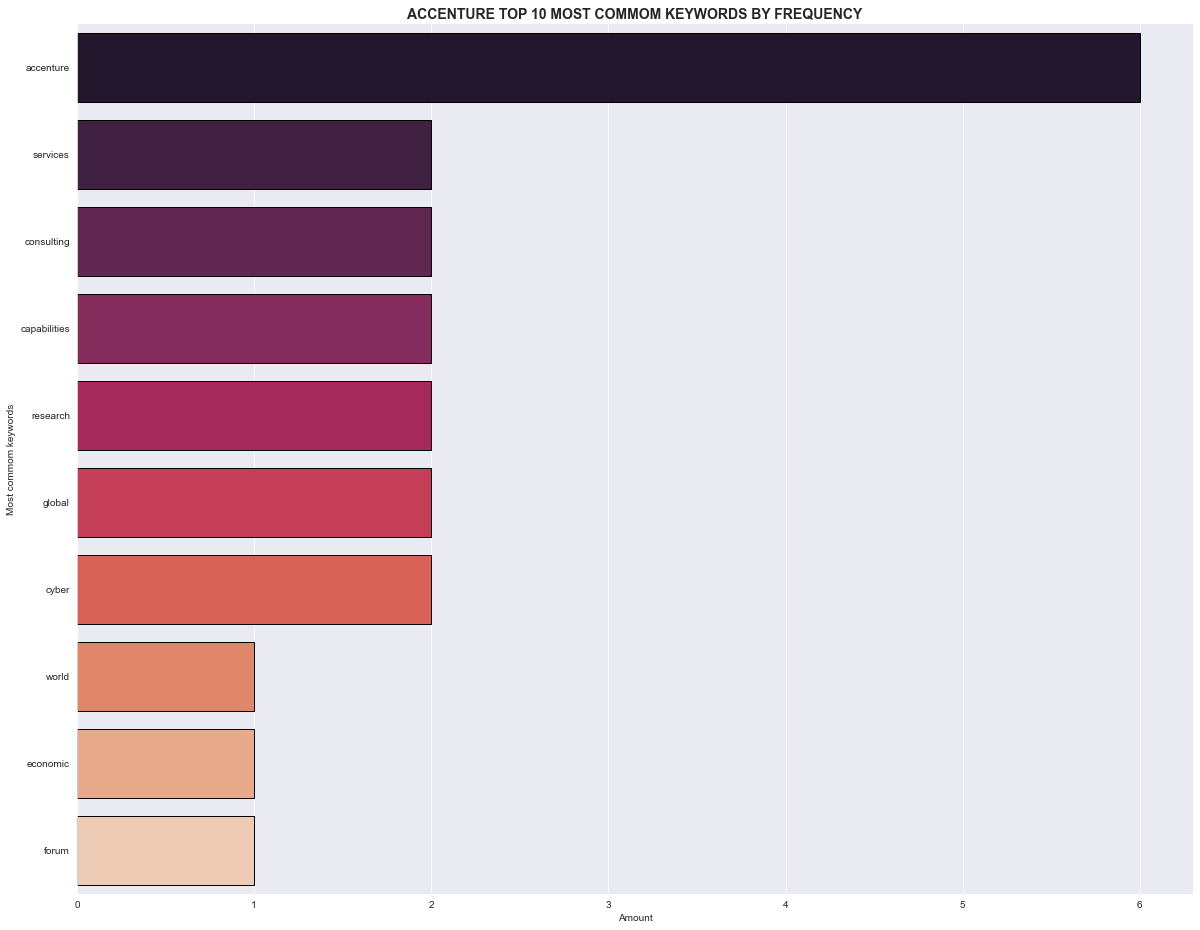

In [9]:
df = pd.DataFrame(words, columns =['Most commom keywords', 'Amount'])
rcParams['figure.figsize'] = 20,16
sns.set_style('darkgrid')
ax = sns.barplot(x='Amount', y='Most commom keywords', data= df[:10], palette='rocket', edgecolor='k')
ax.set_title('ACCENTURE TOP 10 MOST COMMOM KEYWORDS BY FREQUENCY', fontsize=14, weight='bold')
ax.set_xlabel('Amount')
sns.despine();
plt.savefig('accenture_keywords.png')